# Ponder and Prove Combinatorics and Probability
#### Due: Saturday, 6 February 2021, 11:59 pm.

## Conjecture

A number-theoretic conjecture of combinatorial significance is the following:

$degree2({2n \choose n}) =$ the "bits-on count" (or population count, or Hamming weight) of $n$.

$degree2(m)$ is defined as the number (degree, exponent) of 2's in the prime factorization of $m$.

In other words, for any $m$, a positive integer, $m = 2^e \cdot o$ where $o$ is an odd positive integer (could be 1) and $e$ is a natural number, including zero --- which would be the case when $m$ is odd. It's the $e$ that is the $degree2$ of $m$.

Another way to state this conjecture is that the number of 1's in the binary expansion of ${2n \choose n}$ for positive integer $n$ is equal to the number of 2's in the prime factorization of $n$.

Your task is to write Python code to test this conjecture for as many positive integers as you can. See the self-assessment for more details.

Note: a `bitsoncount` function can be a one-liner in Python: `return bin(x).count('1')`



In [3]:
from math import gcd
def nCk(n, k):
  if k < 0 or k > n:
    return 0
  else:
    result = 1
    d = 1
    g = 1
    m = min(k, n - k)
    while (d <= m):
      g = gcd(result, d)
      result = n * (result // g)
      result = (result // (d // g))
      n -= 1
      d += 1
    return result

def degree2(m):
  degree = 0
  while (m % 2 == 0):
    m = m // 2
    degree += 1
  return degree

def main():
  try:
    n = 0
    count1 = lambda x : bin(x).count('1')
    while (True):
      n += 1
      m = nCk(2*n, n)
      if degree2(m) != count1(n):
        print(f"degree2 = {degree2(m)}, 1s = {count1(n)} , n = {n}")
        break
      
  except KeyboardInterrupt:
    print(f"degree2 = {degree2(nCk(2*n, n))}, 1s = {count1(n)} , n = {n}")


if __name__ == "__main__": 
  main()

degree2 = 9, 1s = 9 , n = 41724


## Basic Probability Theory Question
A dark room contains two barrels. The first barrel is filled with green marbles, the second is filled with a half-and-half mixture of green and blue marbles. So there's a 100% chance of choosing a green marble from the first barrel, and a 50% chance of choosing either color in the second barrel. You reach into one of the barrels (it's dark so you don't know which one) and select a marble at random. It's green. You select another. It's green too. You select a third, a fourth, a fifth, etc. Green each time. What is the *minimum* number of marbles you need to select to *exceed* a probability of 99% that you are picking them out of the all-green barrel? (Note that there are enough marbles so that the answer does not depend on how many marbles are in the second barrel.)


If we have the draw all green, what is the probability you are drawing from the pure green barrel?
It is a partial probability problem. The assumption is the denominator and the probability of drawing from the pure green barrel is the nominator.

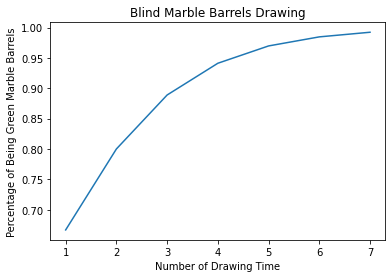

In [4]:
# assume there is infinite of Marble in the bag, so that every time we draw
# anything from the bag will not affect the portion between green marbles and 
# blue marble
import numpy as np 
import matplotlib.pyplot as plt 

yasix = []
xasix = []
n = 1
while (True):
  yasix.append((1/2) / (1/2 + 1/2**(n+1)))
  xasix.append(n)
  if ((1/2) / (1/2 + 1/(2**(n+1))) >= 0.99):
    break
  n += 1
  
  

plt.plot(xasix,yasix)
plt.title('Blind Marble Barrels Drawing')
plt.xlabel('Number of Drawing Time')
plt.ylabel('Percentage of Being Green Marble Barrels')
plt.show()

## A Related But Deeper Basic Probability Theory Question
Take a deep breath. Suppose Shakespeare's account is accurate and Julius Caesar gasped "You too, Brutus" before breathing his last. What is the probability that you just inhaled a molecule that Julius Caesar exhaled in his dying breath?

Assume that after more than two thousand years the exhaled molecules are uniformly spread about the world and the vast majority are still free in the atmosphere. Assume further that there are $10^{44}$ molecules of air in the world, and that your inhaled quantity and Caesar's exhaled quantity were each about $2.2 \times 10^{22}$ molecules.
### Hint
If a number $x$ is small, then $(1 - x)$ is approximately equal to $e^{-x}$.


In [ ]:
## original thought on this problem using Combinatoric
all_pure_combin = nCk(int(10**44 - 10 **22 * 2.2), int(20 **22 * 2.2))
all_combin = nCk(int(10** 44), int(10**22 * 2.2))

result = 1 - all_pure_combin / all_combin

In [5]:
# assuming each event is indepentance
import math
from decimal import *
getcontext().prec = 100

single = Decimal.exp(-1 * Decimal(10**22 * 2.2)/ Decimal(10 **44))

1 - single ** Decimal(10**22 * 2.2)


Decimal('0.9920929459484065595063643543183161578545833524081840119423009763650339909675648639358802073298212001')

## What is True?
Assess yourself on how you did using the checkboxes below. Check a box by putting an 'X' in it only if it is warranted.


### What is true of my experience in general?
(5 points each, 15 points total)
- [x] I had fun.  
I was excited for the result for the first question.
- [x] I learned something new.  
In the marble barrel question, I did not concider the existance of the pure green marble barrel. And Chase has helped me to grasp that idea.
- [x] I achieved something meaningful, or something I can build upon at a later time.  
In the last question, my equation is correct but it is impossible to calculate. Using Chase's method which is naive probability, I can still get the similar output but computable.

### What is true of my report on what I learned?
(5 points each, 25 points total)
- [x] I wrote a sufficient number of well-written sentences.  
I did some comments for what I was trying to do.
- [x] My report is free of "mechanical infelicities" (misspelled words, grammatical errors, punctuation errors, etc.).  
 I hoped. I checked.
- [x] I reported on any connections I found between this investigation and something I already know.  
I have shown my uderstanding on the relationship of the probability and combinatoric
- [x] I reported who were and what contribution each of my collaborators made.  
Chase, Wilcox. He helped me for the second question and suggested me an alternative for the last question.
- [x] I reported on how many numbers I was able to verify with a time/computation budget of 24 hours (in a row).  
Yes, I got degree2 = 9, 1s = 9 , n = 41724 after running for 14 hours. And I am scared my computer will get over heated.


### What is true about my answers?
(15 points each, 60 points total)
- [x] I figured out how to run a Python program continuously for at least 24 hours.  
I believe in Visual Studio. Just keep it on.
- [x] I refrained from printing out anything except the highest number I verified, knowing that printing just slows a program down.  
Handle KeyboardInterrupt will do the job.
- [x] I got the right answer for the first probability theory question.  
Yes
- [x] I got the right answer for the second probability theory question.  
Yes, I think.